# Matplotlib Intro Demo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

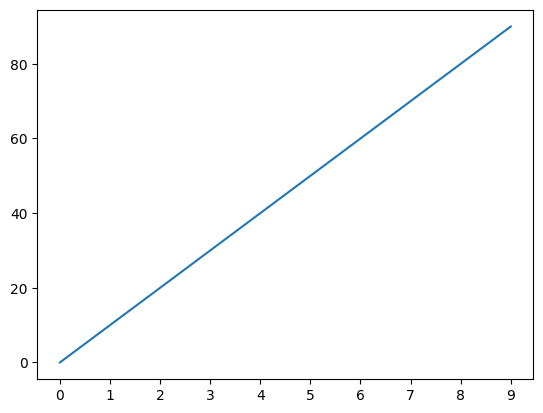

In [2]:
data = [x * 10 for x in range(10)]
labels = [f'{x}' for x in range(10)]

plt.plot(labels, data)

plt.show()

In [3]:
df = pd.DataFrame(data, labels).assign(series2 = lambda x: x[0] /2)

df.head()

,0,series2
0,0,0.0
1,10,5.0
2,20,10.0
3,30,15.0
4,40,20.0


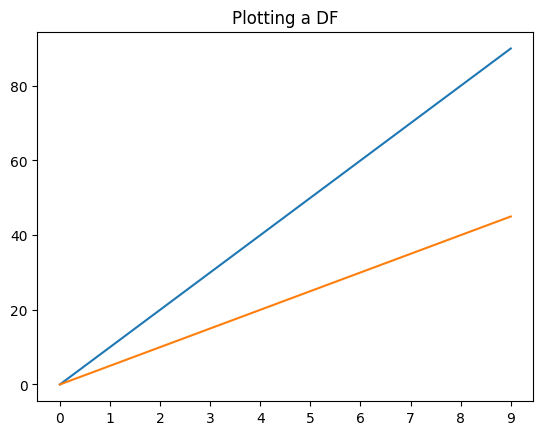

In [4]:
plt.plot(df)

plt.title("Plotting a DF")

plt.show()

# Object Oriented Plotting

Text(0.5, 0.98, 'Overall Title')

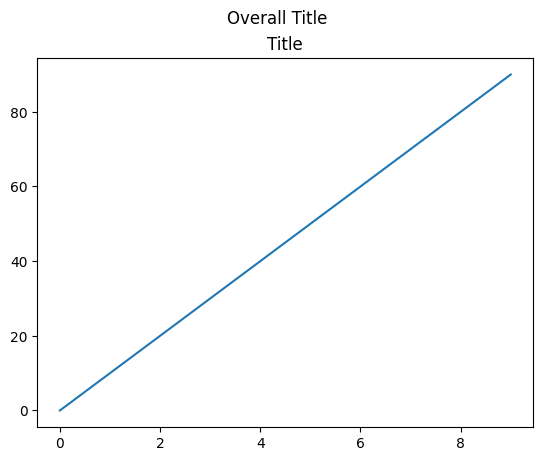

In [5]:
fig = plt.figure()

ax = fig.add_subplot()

ax.plot(data)
ax.set_title("Title")
fig.suptitle("Overall Title")

Text(0.5, 0.98, 'Overall Title')

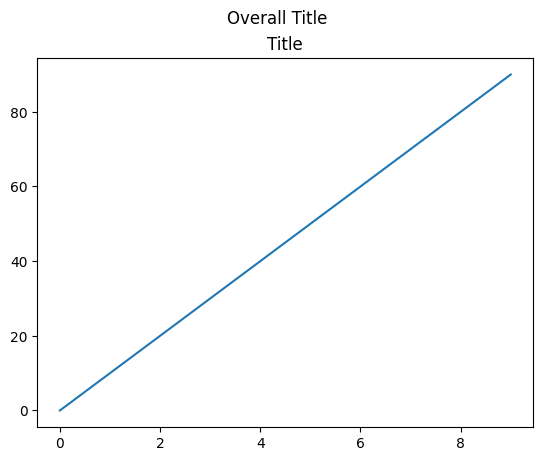

In [6]:
fig, ax = plt.subplots()

ax.plot(data)
ax.set_title("Title")
fig.suptitle("Overall Title")

# Plotting DataFrames

In [7]:
data_dict = {
    "Sales": [10, 20, 30, 40],
    "Profits": [2, 4, 3, 1],
    "Date": ["2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01"]
}


df = pd.DataFrame(
    data_dict, 
    columns=["Sales", "Profits"], 
    index=data_dict["Date"]
)

df

,Sales,Profits
2022-01-01,10,2
2022-02-01,20,4
2022-03-01,30,3
2022-04-01,40,1


Text(0.5, 1.0, 'Product Sales and Profits')

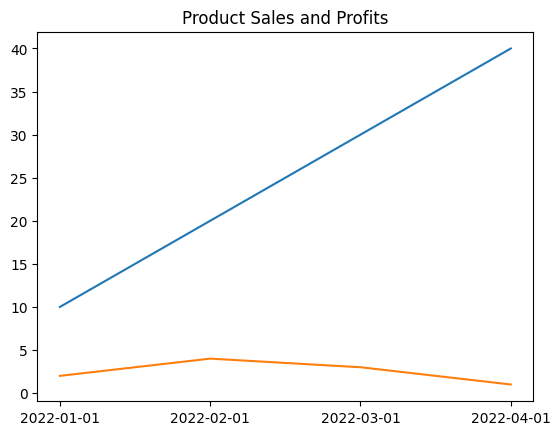

In [8]:
fig, ax = plt.subplots()

ax.plot(df)
ax.set_title("Product Sales and Profits")

Text(0.5, 1.0, 'Product Sales and Profits')

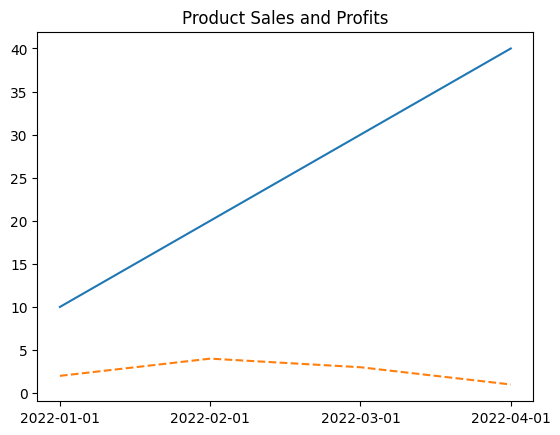

In [9]:
fig, ax = plt.subplots()

ax.plot(df.index, df["Sales"])
ax.plot(df.index, df["Profits"], ls="--")
ax.set_title("Product Sales and Profits")

# Formatted Line Chart Demo

In [11]:
housing_raw = pd.read_csv(
    "../data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
)

ca_housing_pivot = (
    ca_housing
    .pivot_table(
        index="period_begin",
        columns = "region_name",
        values = "median_active_list_price"
    )
    .assign(CA_average = lambda x: x.mean(axis=1))
)

ca_housing_markets = ca_housing_pivot.loc[:, ["San Francisco", 
                                              "Los Angeles", 
                                              "San Diego", 
                                              "Tulare"]]

ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5


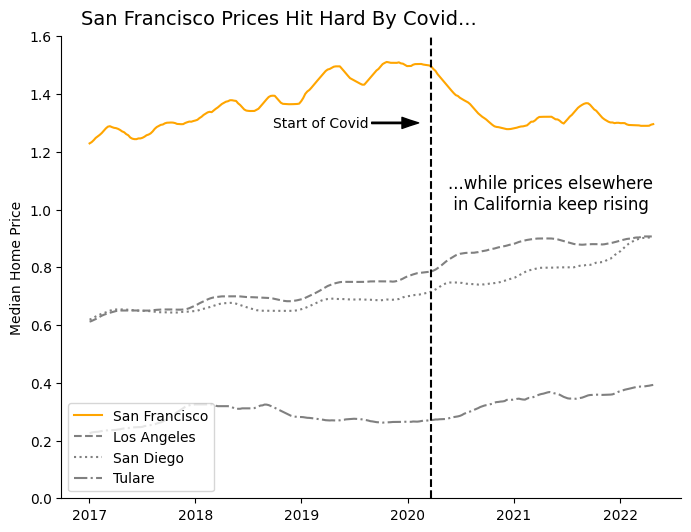

In [12]:
# cm to inch converter function
def cm_to_inches(cm):
    return cm / 2.54

colors=["orange", "grey", "grey", "grey"]
ls=["-", "--", ":", "-."]

fig, ax = plt.subplots(figsize=(8, 6))

for i, column in enumerate(ca_housing_markets.columns):
    ax.plot(
        ca_housing_markets[column] / 1000000, 
        color=colors[i],
        ls=ls[i]
    )

ax.set_ylabel("Median Home Price")

ax.set_ylim(0, 1.6)
ax.axvline(18341, c="black", ls="--")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ca_housing_markets.columns, loc="lower left")


ax.annotate("Start of Covid",
            xy=(18300, 1.3),
            xytext=(17800, 1.3),
            arrowprops=dict(facecolor="black", 
                            width=1, 
                            headwidth=8,
                            connectionstyle="angle3, angleA=270, angleB=0"),
            verticalalignment="center"
           )


fig.text(.15, .9, 
         "San Francisco Prices Hit Hard By Covid...",
         fontsize=14
)

ax.text(18400, 1, 
         "...while prices elsewhere \n in California keep rising",
         fontsize=12
)

plt.show()

# Stacked Line Chart

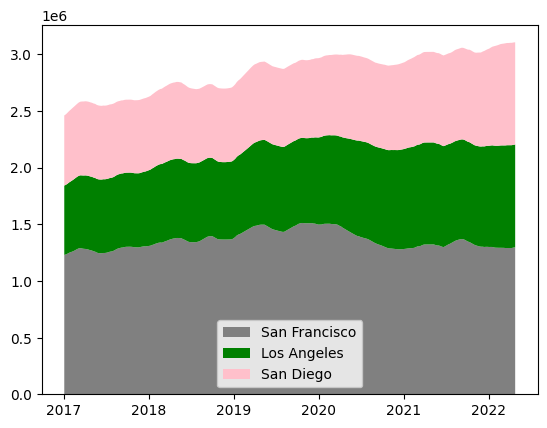

In [13]:
fig, ax = plt.subplots()

labels = ca_housing_markets.columns
colors = ["grey", "green", "pink"]

ax.stackplot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"],
    ca_housing_markets["Los Angeles"],
    ca_housing_markets["San Diego"],
    colors=colors,
    labels=labels
)

ax.legend()

plt.show()

In [14]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


# Dual Axis Line Charts

In [15]:
ca_housing.set_index("period_begin")

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2020-06-22,Sacramento,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
2018-09-03,Nevada,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
2017-06-05,Stanislaus,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
2020-01-20,Tehama,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
2017-11-13,Stanislaus,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362
...,...,...,...,...,...,...,...,...
2018-01-08,Merced,2018-04-01,535,552.0,612.0,55.6,291834.9,14.373568
2017-05-01,Lassen,2017-07-23,1,4.0,4.0,121.1,138666.6,5.000000
2021-06-28,Los Angeles,2021-09-19,19525,14252.0,16098.0,35.5,888483.3,10.008760


In [16]:
sd_dual = (
    ca_housing
    .loc[ca_housing["region_name"] == "San Diego",
        ["inventory", "median_active_list_price", "period_begin"]]
    .set_index("period_begin")
    .sort_index()
)

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


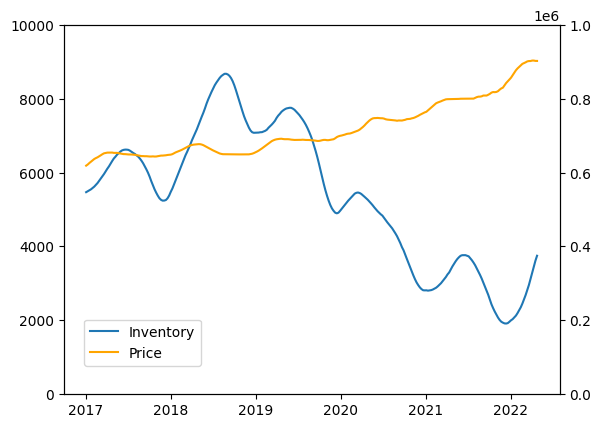

In [17]:
fig, ax = plt.subplots()

ax.plot(sd_dual["inventory"], label="Inventory")
ax.set_ylim(0, 10000)

ax2 = ax.twinx()

ax2.plot(sd_dual["median_active_list_price"], label = "Price", c="orange")
ax2.set_ylim(0, 1000000)

fig.legend(bbox_to_anchor=(.35, .28))

plt.show()

# Bar Charts

<BarContainer object of 5 artists>

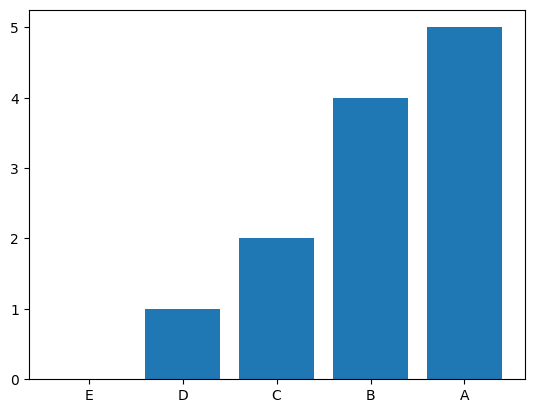

In [18]:
fig, ax = plt.subplots()

labels = ["E", "D", "C", "B", "A"]
data = [0, 1, 2, 4, 5]
ax.bar(labels, data)

<BarContainer object of 5 artists>

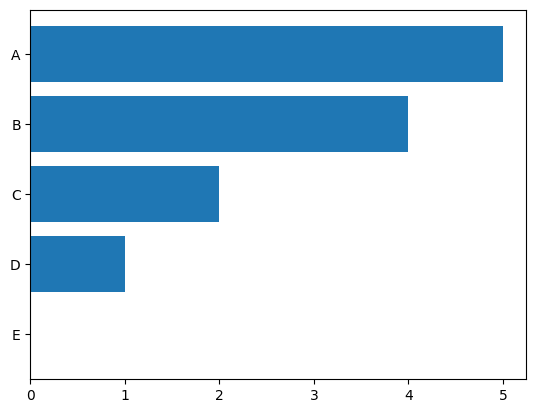

In [19]:
fig, ax = plt.subplots()

labels = ["E", "D", "C", "B", "A"]
data = [0, 1, 2, 4, 5]
ax.barh(labels, data)

In [20]:
total_sold = (ca_housing
 .groupby("region_name")
 .agg({"total_homes_sold":"sum"})
 .sort_values("total_homes_sold", ascending=False)
 .iloc[:10])

total_sold

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727
Sacramento,1256838
Santa Clara,967707
Alameda,925469
Contra Costa,921039


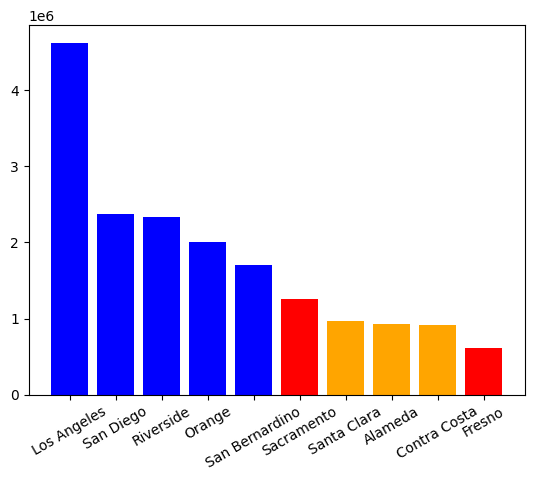

In [21]:
fig, ax = plt.subplots()

colors = [
    "blue", 
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red"
]

ax.bar(x=total_sold.index, 
       height=total_sold["total_homes_sold"],
       color=colors
)

ax.xaxis.set_tick_params(rotation=30)

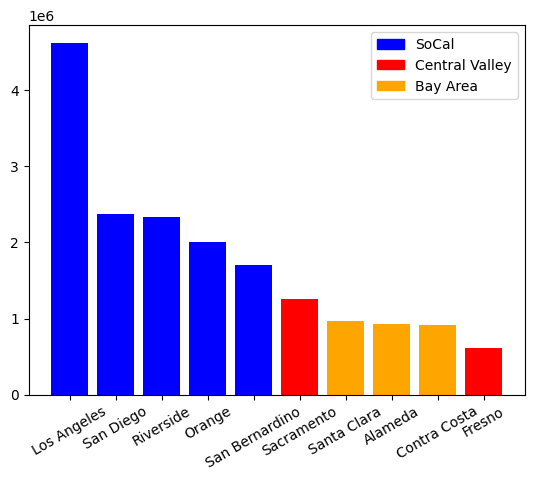

In [22]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

colors = [
    "blue", 
    "blue",
    "blue",
    "blue",
    "blue",
    "red",
    "orange",
    "orange",
    "orange",
    "red"
]

ax.bar(x=total_sold.index, 
       height=total_sold["total_homes_sold"],
       color=colors
)

socal = mpatches.Patch(color='blue', label='SoCal')
central = mpatches.Patch(color='red', label='Central Valley')
bay = mpatches.Patch(color='orange', label='Bay Area')

plt.legend(handles=[socal, central, bay], loc="upper right")
ax.xaxis.set_tick_params(rotation=30)

# Stacked Bar Charts

In [23]:
ca_or = (housing_raw
         .loc[housing_raw["region_name"].str[-2:].isin(["CA", "OR", "WA"])]
         .assign(price_range = pd.cut(
                    housing_raw.loc[:,"median_active_list_price"],
                    [0, 400000, 600000, 2000000],
                    labels=["0-400k", "400k-600k","600k+"]),
                state = lambda x: x["region_name"].str[-2:]
        ).query("period_end == '2021-08-01'")
         .pivot_table(
             index="price_range",
             columns="state",
             values="inventory",
            aggfunc="sum"
         )
)


ca_or.head()

C:\Users\ahosny\AppData\Local\Temp\ipykernel_15552\382031926.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ).query("period_end == '2021-08-01'")
C:\Users\ahosny\AppData\Local\Temp\ipykernel_15552\382031926.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ca_or = (housing_raw


state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


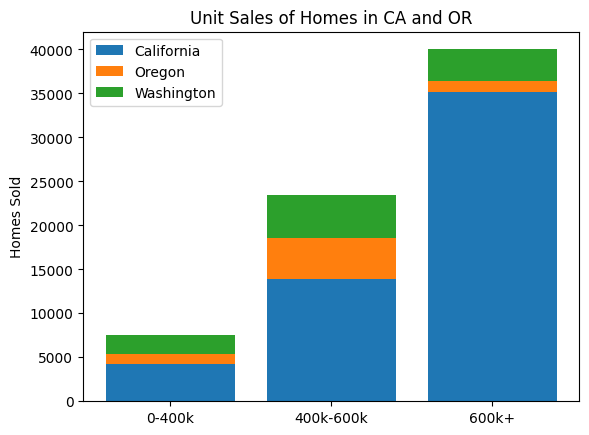

In [24]:
fig, ax = plt.subplots()

ax.bar(
    ca_or.index, 
    ca_or["CA"], 
    label="California"
)

ax.bar(
    ca_or.index, 
    ca_or["OR"], 
    label="Oregon", 
    bottom=ca_or["CA"]
)


ax.bar(
    ca_or.index, 
    ca_or["WA"], 
    label="Washington", 
    bottom=ca_or["CA"] + ca_or["OR"]
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.legend()

# Grouped Bar Charts

In [25]:
ca_or

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


<Axes: xlabel='price_range'>

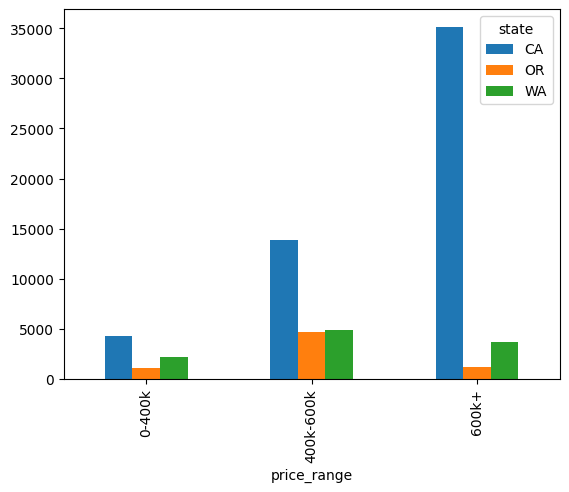

In [26]:
ca_or.plot.bar()

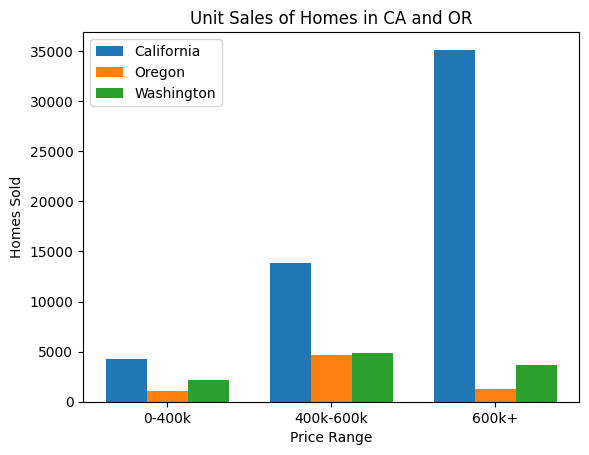

In [27]:
import numpy as np
fig, ax = plt.subplots()

width = .25

x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1, 
    ca_or["CA"], 
    label="California",
    width=width
)

ax.bar(
    x2, 
    ca_or["OR"], 
    label="Oregon", 
    width=width
)


ax.bar(
    x3, 
    ca_or["WA"], 
    label="Washington", 
    width=width
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.set_xlabel('Price Range')
# ax.set_xticks(x2)
# ax.set_xticklabels(ca_or.index)

plt.xticks(
    x2, 
    ca_or.index, 
)

ax.legend()

plt.show()

# Combo Charts

In [28]:
sd_dual2 = sd_dual.resample("Y").mean()

sd_dual2

C:\Users\ahosny\AppData\Local\Temp\ipykernel_15552\2108416439.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sd_dual2 = sd_dual.resample("Y").mean()


,inventory,median_active_list_price
period_begin,,
2017-12-31,5986.730769,645314.217308
2018-12-31,7438.433962,658434.637736
2019-12-31,6794.538462,685614.486538
2020-12-31,4494.076923,735517.426923
2021-12-31,2975.961538,803811.036538
2022-12-31,2692.470588,889710.241176


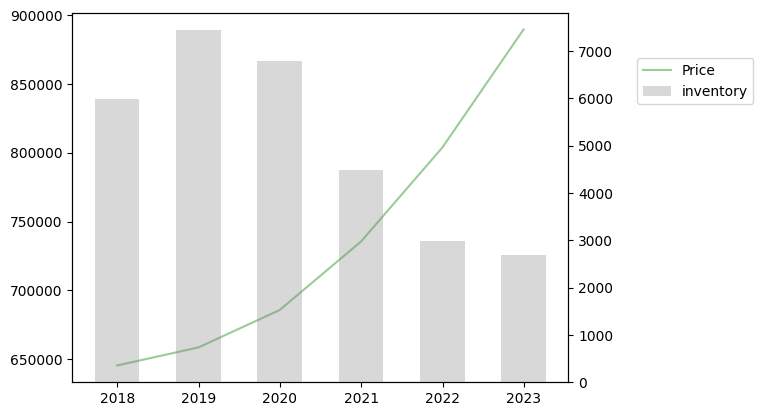

In [29]:
fig, ax = plt.subplots()

width = 200

ax.plot(
    sd_dual2["median_active_list_price"],
    color="green",
    alpha=.4,
    label="Price"
)
# ax.legend()

ax2 = ax.twinx()

ax2.bar(sd_dual2.index, 
        sd_dual2["inventory"], 
         width=width,
        color="grey",
        alpha=.3,
        label="inventory"   
       )

# ax2.legend()

fig.legend(bbox_to_anchor=(1.2, .8))

plt.show()

# Pie Charts

In [30]:
sales_totals = (
    ca_housing
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
    .groupby("region_name")
    .agg({"total_homes_sold":"sum"})
)

sales_totals.head()

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


Text(0.5, 1.0, 'Share of Home Sales Select CA Markets')

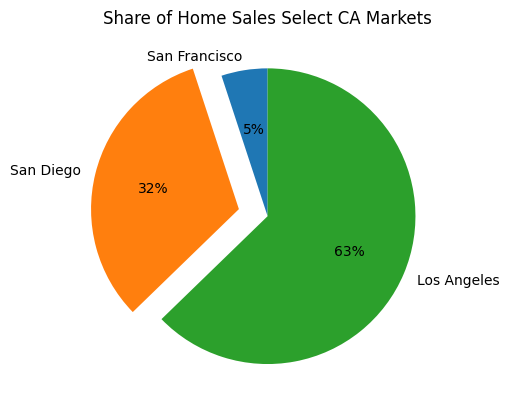

In [31]:
fig, ax = plt.subplots()

ax.pie(x=sales_totals["total_homes_sold"][::-1],
       startangle=90,
       labels=["San Francisco", "San Diego", "Los Angeles",], 
       autopct="%.0f%%",
       explode=(0, .2, 0)
      )


ax.set_title("Share of Home Sales Select CA Markets")

Text(0.5, 1.0, 'Share of Home Sales Select CA Markets')

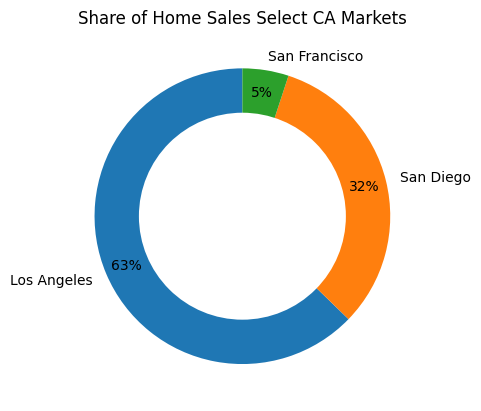

In [32]:
fig, ax = plt.subplots()

ax.pie(x=sales_totals.iloc[:, 0],
       startangle=90,
       labels=["Los Angeles", "San Diego", "San Francisco"], autopct="%.0f%%",
       explode=(0, 0, 0),
       pctdistance=.85)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

ax.set_title("Share of Home Sales Select CA Markets")

Text(0.5, 1.0, 'Brazil % of Goal 2018')

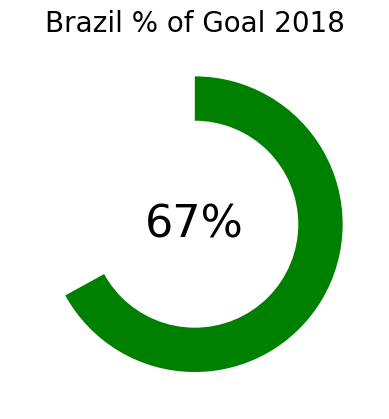

In [33]:
fig, ax = plt.subplots()

ax.pie(
    [.33, .67],
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["white", "green"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    "67%", 
    ha='center', 
    va='center', 
    fontsize=32
)
  

ax.set_title("Brazil % of Goal 2018", fontsize=20)

# Histograms

In [34]:
diamonds = pd.read_csv("../data/Diamonds Prices2022.csv")

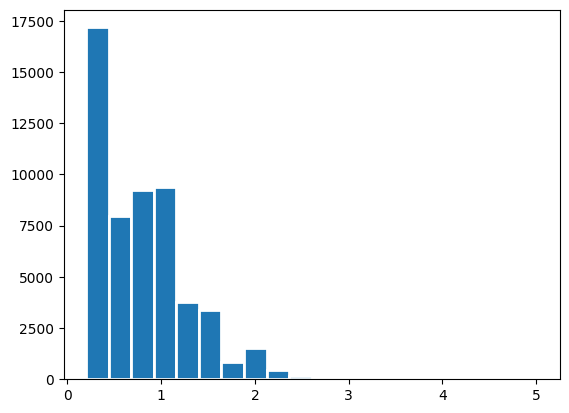

In [35]:
fig, ax = plt.subplots()

ax.hist(
    diamonds["carat"],
    bins=20,
#     density=True,
    edgecolor='white',
    linewidth=2,
)

plt.show()

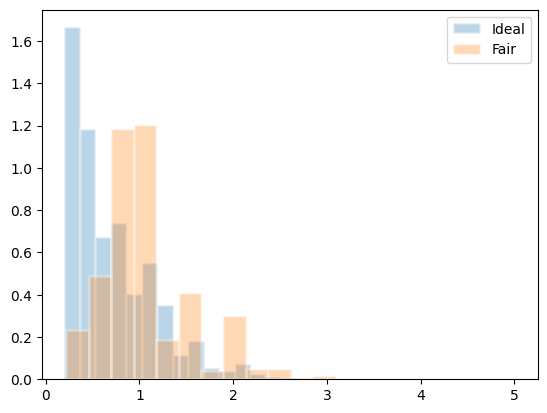

In [36]:
fig, ax = plt.subplots()

ax.hist(
    diamonds.loc[diamonds["cut"]=="Ideal", ["carat"]],
    bins=20,
    density=True,
    edgecolor='white',
    linewidth=2,
    alpha=.3
)

ax.hist(
    diamonds.loc[diamonds["cut"]=="Fair", ["carat"]],
    bins=20,
    density=True,
    edgecolor='white',
    linewidth=2,
    alpha=.3
)

ax.legend(["Ideal", "Fair"])

plt.show()